# References
- https://github.com/thekimk/All-About-Time-Series-Analysis/
- https://github.com/JWarmenhoven/ISLR-python
- https://www.geeksforgeeks.org/python-pandas-series/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from scipy import stats
from statsmodels.datasets import get_rdataset
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Handling Time-series Data with Pandas

## Main data structures of Pandas: DataFrame and Series
<img src="https://media.geeksforgeeks.org/wp-content/uploads/dataSER-1.png">

## Read data



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv', usecols=[1,2,3,4])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Print the loaded data

In [3]:
df = pd.read_excel('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Default.xlsx')
df.head(3)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947


In [4]:
df = pd.read_excel('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Default.xlsx')
df.tail(5)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365
9999,10000,No,Yes,200.922183,16862.952321


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv', usecols=[1,2,3,4])
df[['Radio', 'TV', 'Newspaper']].describe()

,Radio,TV,Newspaper
count,200.000000,200.000000,200.000000
mean,23.264000,147.042500,30.554000
std,14.846809,85.854236,21.778621
min,0.000000,0.700000,0.300000
25%,9.975000,74.375000,12.750000
50%,22.900000,149.750000,25.750000
75%,36.525000,218.825000,45.100000
max,49.600000,296.400000,114.000000


## Select a few features from the data

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Hitters.csv')
df.head(3)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A


In [7]:
feature_names = ['Years', 'Hits']

X = df[feature_names]
X.head()

,Years,Hits
0,1,66
1,14,81
2,3,130
3,11,141
4,2,87


## Add a new feature to the data

In [8]:
credit = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Credit.csv', usecols=list(range(1,12)))
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [9]:
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


## Removing features from the data

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Heart.csv')
df.head(3)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df.head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Heart.csv').drop('ChestPain', axis=1).dropna()
df.head(3)

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


## Visualization

In [13]:
co2_data = fetch_openml(data_id=41187, as_frame=True).frame
co2_data

,year,month,day,weight,flag,station,co2
0,1958.0,3.0,29.0,4.0,0.0,MLO,316.1
1,1958.0,4.0,5.0,6.0,0.0,MLO,317.3
2,1958.0,4.0,12.0,4.0,0.0,MLO,317.6
3,1958.0,4.0,19.0,6.0,0.0,MLO,317.5
4,1958.0,4.0,26.0,2.0,0.0,MLO,316.4
...,...,...,...,...,...,...,...
2220,2001.0,12.0,1.0,7.0,0.0,MLO,370.3
2221,2001.0,12.0,8.0,7.0,0.0,MLO,370.8
2222,2001.0,12.0,15.0,7.0,0.0,MLO,371.2
2223,2001.0,12.0,22.0,6.0,0.0,MLO,371.3


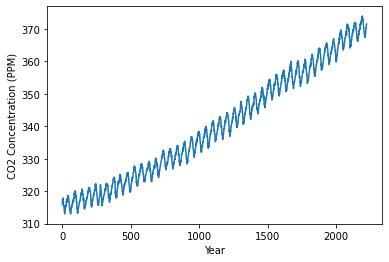

In [14]:
co2_data['co2'].plot()
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (PPM)')
plt.show()

In [15]:
deaths = get_rdataset('deaths', package='MASS').data
deaths.index = pd.date_range('1974-01-01', periods=len(deaths), freq='MS')
deaths = deaths[['value']]
deaths

,value
1974-01-01,3035
1974-02-01,2552
1974-03-01,2704
1974-04-01,2554
1974-05-01,2014
...,...
1979-08-01,1354
1979-09-01,1333
1979-10-01,1492
1979-11-01,1781


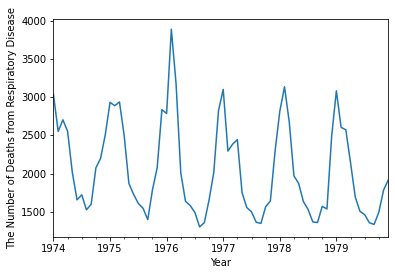

In [16]:
deaths['value'].plot()
plt.xlabel('Year')
plt.ylabel('The Number of Deaths from Respiratory Disease')
plt.show()

## Exercise

In [17]:
data = get_rdataset('AirPassengers').data
data.index = pd.date_range(start='1949/1/1', periods=len(data), freq='MS')
data = data[['value']]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [18]:
# TODO: Print the first 5 rows of the dataset

data.head(5)

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
# TODO: Print the last 5 rows of the dataset.

data.tail(5)

,value
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [20]:
# TODO: Get a series object from the data

data[['value']]

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


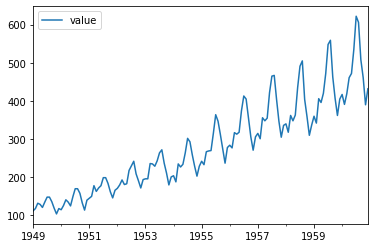

In [21]:
# TODO: Plot the air passenger over time

data[['value']].plot()

# White Noise

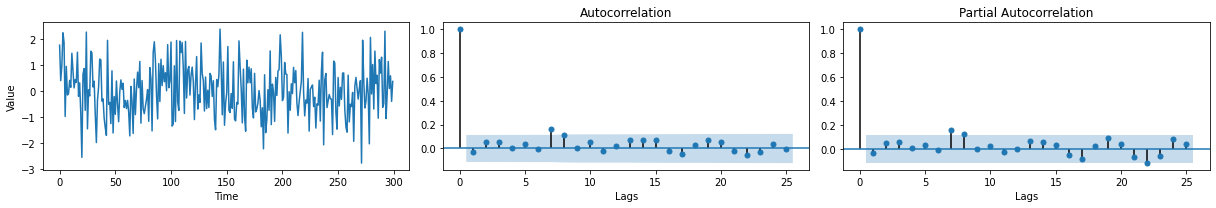

In [22]:
wn = stats.norm.rvs(size=300, random_state=0)
fig, ax = plt.subplots(1, 3, figsize=(17, 3))
ax[0].plot(wn)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
plot_acf(wn, ax=ax[1])
plot_pacf(wn, ax=ax[2], method='ywm')
ax[1].set_xlabel('Lags')
ax[2].set_xlabel('Lags')
plt.tight_layout()
plt.show()

# Stationary Test

## Ljung-Box Test: Test randomness
- p < 0.05: The data is not independently distriubted. (Non-stationary)
- p ≥ 0.05: The data is randomly distributed. (Stationary)

In [23]:
lb_stat, lb_pvalue = acorr_ljungbox(wn, lags=[20])
print(f'lb_stat: {lb_stat}, lb_pvalue: {lb_pvalue}')

lb_stat: [24.65344979], lb_pvalue: [0.21501213]


## Augmented Dickey-Fuller (ADF) test: Existence of trend
- p < 0.05: Trend does not exists. (Stationary)
- p ≥ 0.05: Trend exists. (Non-stationary)

In [24]:
adf, p_value, _, _, _, _ = adfuller(wn)
print(f'adf: {adf:f}, p_value: {p_value:f}')

adf: -17.839398, p_value: 0.000000


## Kwiatkowski Phillips Schmidt Shin (KPSS) test: Existence of seasonality
- p ≥ 0.05: Seasonality does not exists. (Stationary)
- p < 0.05: Seasonality exists. (Non-stationary)

In [25]:
kpss_stats, p_value, lags, crit = kpss(wn, lags='auto')
print(f'kpss_stats: {kpss_stats:f}, p_value: {p_value:f}')

kpss_stats: 0.225706, p_value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Exercise

In [26]:
# TODO: Run ADF test on the CO2 concentration data

acorr_ljungbox(co2_data['co2'], lags=[20])

(array([42617.94251013]), array([0.]))

In [27]:
# TODO: Run KPSS test on the number of death from respiratory disease

kpss(co2_data['co2'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(7.98556734420094,
 0.01,
 27,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})